# Gradient Descent and Steepest Descent

## Gradient Descent algorithm
1. Start with an initial guess $x^{(0)}$
1. Update $x^{(k+1)} = x^{(k)} - \alpha \nabla f(x^{(k)})$
1. Repeat step 2 st $ ||\nabla f(x) || < \epsilon $

## Implementation

In [1]:
import numpy as np

def grad_desc(f, x0, eps, alpha):
    n = 0
    x = x0
    x_list = [x]
    graf_f_list = list()
    grad_f_norm = 100
    
    while grad_f_norm > eps:
        # make step
        grad_f = get_grad_f(x)
        x = x - (alpha*grad_f)
        x_list.append(x)
        grad_f_norm = np.linalg.norm(grad_f)
        graf_f_list.append(grad_f_norm)
        
        n += 1
#         print(f"n = {n}\t\t x = ({x[0]:.4f}, {x[1]:.4f}), f(x) = {f(x):.4f}, norm grad f = {grad_f_norm:.4f}")
    return np.array(x_list), np.array(graf_f_list)

To minimise 
$$ f(x) = x_1^2 + x_2^2 - x_1x_2 + 2x_1 + 2x_2 $$
with 
$$ x^{(0)} = \begin{pmatrix} -2.5 \\ -1.1\end{pmatrix} $$
We set epsilon to be $\epsilon = 10^{-8}$

In [2]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    ans = x1**2 + x2**2 - x1*x2 + 2*x1 + 2*x2
    return ans

def get_grad_f(x):
    grad_f = np.zeros(len(x))
    x1 = x[0]
    x2 = x[1]
    # derivatives of f(x)
    grad_f[0] = 2*x1 - x2 + 2
    grad_f[1] = 2*x2 - x1 + 2
    return grad_f

In [3]:
x0 = np.array([-2.5, -1.1])
eps = 1e-3
alpha = 0.1
X, G = grad_desc(f, x0, eps, alpha)

Now let's plot the trajectory.

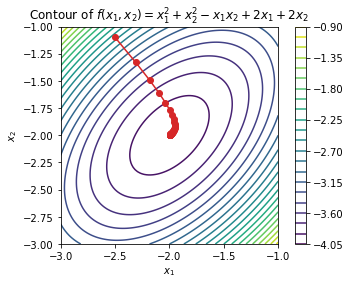

In [4]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

N = 100
p_min = -3
p_max = -1
x1_i = np.linspace(p_min, p_max, N)
x2_i = np.linspace(p_min, p_max, N)
x1, x2 = np.meshgrid(x1_i, x2_i)

f = x1**2 + x2**2 - x1*x2 + 2*x1 + 2*x2

plt.contour(x1, x2, f, 20)
plt.plot(X[:,0], X[:,1], "C3o-")

plt.colorbar()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Contour of $f(x_1,x_2) =x_1^2 + x_2^2 - x_1x_2 + 2x_1 + 2x_2$")
plt.axes().set_aspect("equal")

## Steepest descent for a quadratic

A quadratic function can be written as
$$
f(x) = \frac{1}{2}\vec{x}^TQ\vec{x} - \vec{x}^T\vec{b}
$$
where $Q\in\mathbb{R}^{n\times n}$ is a symmetric positive definite matrix and $\vec{b}, \vec{x}\in\mathbb{R}^n$

Gradient of $f(x)$: $\nabla f(x) = Qx-b $  
Hessian of $f(x)$: $F(x) = Q$

**Example**

Consider
$$
Q=\begin{pmatrix} 2&1\\1&8\end{pmatrix}\quad g=\begin{pmatrix} 2\\1\end{pmatrix}
$$

*(Optional)* We can find f(x) now
$$
f(x) =  \frac{1}{2}\vec{x}^TQ\vec{x} - \vec{x}^T\vec{b} =
\frac{1}{2}\begin{pmatrix} x_1&x_2\end{pmatrix}\begin{pmatrix} 2&1\\1&8\end{pmatrix}\begin{pmatrix} x_1\\x_2\end{pmatrix} - \begin{pmatrix} x_1&x_2\end{pmatrix}b
$$

$$
f(x) = \frac{1}{2}\begin{pmatrix} 2x_1+x_2&x_1+8x_2\end{pmatrix}\begin{pmatrix} x_1\\x_2\end{pmatrix} - \begin{pmatrix} x_1&x_2\end{pmatrix}b
$$

...

Compute
$$
\alpha_k = \frac{g^Tg}{g^TQg}
$$

In [5]:
Q = np.array([[2,1],[1,8]])
g = np.array([2,1])

Q_g = np.dot(Q,g)
alpha = np.dot(g,g)/np.dot(g,Q_g)

print(f"Alpha is: {alpha}")

Alpha is: 0.25


## Examples

**Example 1**  
Minimise
$$
f(x) = 3(x_1^2+x_2^2) + 4x_1x_2 + 5x_1 + 6x_2 + 7
$$
using gradient descent starting at
$$
x^{(0)} = \begin{pmatrix} 0\\0\end{pmatrix}
$$.

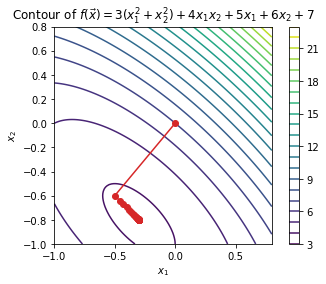

In [6]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    ans = 3*(x1**2 + x2**2) +4*x1*x2 + 5*x1 + 6*x2 + 7
    return ans

def get_grad_f(x):
    grad_f = np.zeros(len(x))
    x1 = x[0]
    x2 = x[1]
    # derivatives of f(x)
    grad_f[0] = 6*x1 + 4*x2 + 5
    grad_f[1] = 6*x2 + 4*x1 + 6
    return grad_f

x0 = np.array([-0, 0])
eps = 1e-8
alpha = 0.1
X, G = grad_desc(f, x0, eps, alpha)


N = 100
p_min = -1
p_max = .8
x1_i = np.linspace(p_min, p_max, N)
x2_i = np.linspace(p_min, p_max, N)
x1, x2 = np.meshgrid(x1_i, x2_i)

f = 3*(x1**2 + x2**2) +4*x1*x2 + 5*x1 + 6*x2 + 7

plt.contour(x1, x2, f, 20)
plt.plot(X[:,0], X[:,1], "C3o-")

plt.colorbar()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Contour of $f(\vec{x}) = 3(x_1^2+x_2^2) + 4x_1x_2 + 5x_1 + 6x_2 + 7$")
plt.axes().set_aspect("equal")

**Example 2**  
Minimise
$$
f(\vec{x}) = x_1^2 + x_1x_2+4x_2^2
$$
using steepest gradient descent starting at
$$
x^{(0)} = \begin{pmatrix} 1\\0\end{pmatrix}
$$.

In [7]:
def steep_desc(Q, x0, eps):
    n = 0
    x = x0
    x_list = [x]
    graf_f_list = list()
    grad_f_norm = 100
        
    while grad_f_norm > eps:
        g = get_grad_f(x)
        
        # get alpha
        Q_g = np.dot(Q,g)
        alpha = np.dot(g,g)/np.dot(g,Q_g)
        
        # get new x
        x = x - (alpha*g)
        
        x_list.append(x)
        grad_f_norm = np.linalg.norm(g)
        graf_f_list.append(grad_f_norm)
        
        n += 1
#         print(f"n = {n}\t\t x = ({x[0]:.4f}, {x[1]:.4f}), f(x) = {f(x):.4f}, norm grad f = {grad_f_norm:.4f}")
    return np.array(x_list), np.array(graf_f_list)

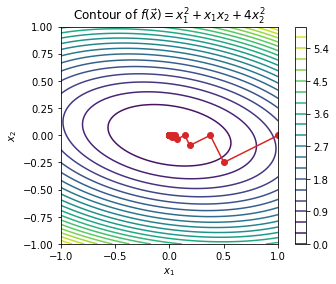

In [8]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    ans = x1**2 + x1*x2 + 4*x_2**2
    return ans

def get_grad_f(x):
    grad_f = np.zeros(len(x))
    x1 = x[0]
    x2 = x[1]
    # derivatives of f(x)
    grad_f[0] = 2*x1 + x2
    grad_f[1] = x1 + 8*x2
    return grad_f

x0 = np.array([1, 0])
eps = 1e-8
# alpha = 0.1
Q = np.array([[2, 1],[1,8]])

# X, G = grad_desc(f, x0, eps, alpha)
X, G = steep_desc(Q, x0, eps)

N = 100
p_min = -1
p_max = 1
x1_i = np.linspace(p_min, p_max, N)
x2_i = np.linspace(p_min, p_max, N)
x1, x2 = np.meshgrid(x1_i, x2_i)

f = x1**2 + x1*x2 + 4*x2**2

plt.contour(x1, x2, f, 20)
plt.plot(X[:,0], X[:,1], "C3o-")

plt.colorbar()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Contour of $f(\vec{x}) = x_1^2 + x_1x_2+4x_2^2$")
plt.axes().set_aspect("equal")

**Example 3**  
Minimise
$$
f(\vec{x}) = x_1 + \frac{1}{2}x_2 + \frac{1}{2}x_1^2 + x_2^2 + 3
$$
using steepest gradient descent starting at
$$
x^{(0)} = \begin{pmatrix} 0\\0\end{pmatrix}
$$.

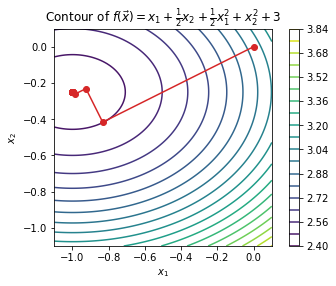

In [9]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    ans = x1 + 1/2*x2 + 1/2*x1**2 + x2**2 + 3
    return ans

def get_grad_f(x):
    grad_f = np.zeros(len(x))
    x1 = x[0]
    x2 = x[1]
    # derivatives of f(x)
    grad_f[0] = 1 + x1
    grad_f[1] = 1/2 + 2*x2
    return grad_f

x0 = np.array([-0, 0])
eps = 1e-8
alpha = 0.1
Q = np.array([[1,0],[0,2]])

# X, G = grad_desc(f, x0, eps, alpha)
X, G = steep_desc(Q, x0, eps)

N = 100
p_min = -1.1
p_max = .1
x1_i = np.linspace(p_min, p_max, N)
x2_i = np.linspace(p_min, p_max, N)
x1, x2 = np.meshgrid(x1_i, x2_i)

f = x1 + 1/2*x2 + 1/2*x1**2 + x2**2 + 3

plt.contour(x1, x2, f, 20)
plt.plot(X[:,0], X[:,1], "C3o-")

plt.colorbar()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Contour of $f(\vec{x}) = x_1 + \frac{1}{2}x_2 + \frac{1}{2}x_1^2 + x_2^2 + 3$")
plt.axes().set_aspect("equal")